In [1]:
!pip install diffusers["torch"] transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.2 MB/s eta 0:00:0000:0100:01


 DONE

In [2]:
!pip install accelerate


In [3]:
!pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-ka1fvyir
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-ka1fvyir
  Resolved https://github.com/huggingface/diffusers to commit d8a16635f47ac455abd61879bcc6be32dfeaa561
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.31.0.dev0-py3-none-any.whl size=2688798 sha256=71b18a851f9785f83dfce3a06d7e3bea083dec8f8b112200f0116a3349ae4b87
  Stored in directory: /tmp/pip-ephem-wheel-cache-wlg1bdy9/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.2
    Uninstalling diffusers-0.30.2:
      Successfully uninstalled diffusers-0.30.2


In [4]:
import torch
from diffusers import StableDiffusionPipeline
from diffusers import AutoPipelineForText2Image



#pipe = StableDiffusionPipeline.from_pretrained("emilianJR/chilloutmix_NiPrunedFp32Fix",torch_dtype=torch.float16)
#pipe = StableDiffusionPipeline.from_pretrained("emilianJR/epiCRealism", torch_dtype=torch.float16)
pipe = AutoPipelineForText2Image.from_pretrained("lykon/dreamshaper-8", torch_dtype=torch.float32)


pipe = pipe.to("cuda")
pipe.safety_checker = None


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/796 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/756 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


UP to here

  0%|          | 0/50 [00:00<?, ?it/s]

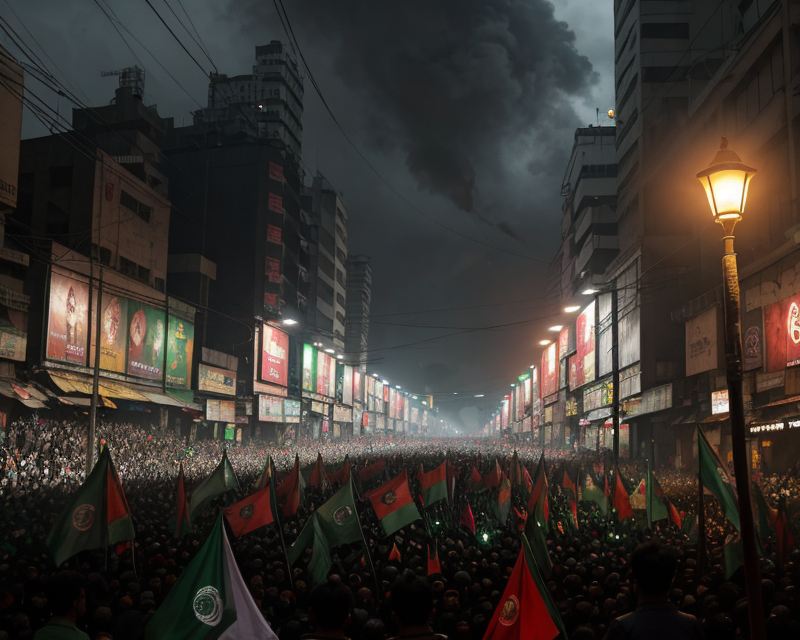

In [5]:
prompt = "Bangladesh,crowd of protesters,,clash, bangladesh flag wave,police violence,street light, low light, cyberpunk,futuristic, CGSociety, highly detailed, vibrant Bangladesh,street light, low light,cinematic,  mid-shot, highly detailed,  Unreal Engine, cinematic wallpaper,dark clouds,gloomy,picaso"
h=640
w=800
steps=50
guidance=8.5
neg = "cars, easynegative, lowres, bad anatomy, bad hands, text, error, missing limbs, bad anatomy,watermark"
seed = 42
generator = torch.manual_seed(seed)
image = pipe(
    prompt,  
    num_inference_steps=steps,
    height=h, 
    width=w, 
    guidance_scale=guidance, 
    negative_prompt=neg, 
    generator=generator
    
).images[0]
image

In [6]:
from diffusers import StableDiffusionPipeline
import torch

model_ckpt = "CompVis/stable-diffusion-v1-4"
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_ckpt, torch_dtype=torch.float16).to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
prompt = "Bangladesh,crowd of protesters,,clash, bangladesh flag wave,police violence,street light, low light, cyberpunk,futuristic, CGSociety, highly detailed, vibrant Bangladesh,street light, low light,cinematic,  mid-shot, highly detailed,  Unreal Engine, cinematic wallpaper,dark clouds,gloomy,picaso"
h=640
w=800
steps=50
guidance=8.5
neg = "cars, easynegative, lowres, bad anatomy, bad hands, text, error, missing limbs, bad anatomy,watermark"
generator = torch.manual_seed(seed)
image = pipe(prompt,  num_inference_steps=steps,height=h, width=w, guidance_scale=guidance, negative_prompt=neg,generator =generator, output_type="np").images

  0%|          | 0/50 [00:00<?, ?it/s]

In [8]:
from torchmetrics.functional.multimodal import clip_score
from functools import partial

clip_score_fn = partial(clip_score, model_name_or_path="openai/clip-vit-base-patch16")

def calculate_clip_score(images, prompts):
    images_int = (images * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)

sd_clip_score = calculate_clip_score(image, prompt)
print(f"CLIP score: {sd_clip_score}")

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIP score: 42.9531
